In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          accumulation_steps=2,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 5e-05 wd: 0.0, Lora alpha 8, rank 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5508	Val Loss:	1.0975	Accuracy:	0.3866	F1:	0.2155
2 / 30: Train Loss:	0.5474	Val Loss:	1.0821	Accuracy:	0.4118	F1:	0.3407
3 / 30: Train Loss:	0.5391	Val Loss:	1.0712	Accuracy:	0.3782	F1:	0.2567
4 / 30: Train Loss:	0.5285	Val Loss:	1.0494	Accuracy:	0.4538	F1:	0.3837
5 / 30: Train Loss:	0.5191	Val Loss:	0.9980	Accuracy:	0.5462	F1:	0.5123
6 / 30: Train Loss:	0.4778	Val Loss:	0.8720	Accuracy:	0.5546	F1:	0.5379
7 / 30: Train Loss:	0.4192	Val Loss:	0.7517	Accuracy:	0.6387	F1:	0.6241
8 / 30: Train Loss:	0.3702	Val Loss:	0.7112	Accuracy:	0.6471	F1:	0.6381
9 / 30: Train Loss:	0.3352	Val Loss:	0.6667	Accuracy:	0.7059	F1:	0.7059
10 / 30: Train Loss:	0.3145	Val Loss:	0.6109	Accuracy:	0.7479	F1:	0.7485
11 / 30: Train Loss:	0.2902	Val Loss:	0.6153	Accuracy:	0.7563	F1:	0.7567
12 / 30: Train Loss:	0.2673	Val Loss:	0.5969	Accuracy:	0.7479	F1:	0.7471
13 / 30: Train Loss:	0.2330	Val Loss:	0.5582	Accuracy:	0.7563	F1:	0.7569
14 / 30: Train Loss:	0.2278	Val Loss:	0.5791	Accuracy:	0.781

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5508	Val Loss:	1.0972	Accuracy:	0.3866	F1:	0.2151
2 / 30: Train Loss:	0.5472	Val Loss:	1.0814	Accuracy:	0.4118	F1:	0.3407
3 / 30: Train Loss:	0.5381	Val Loss:	1.0656	Accuracy:	0.3782	F1:	0.2567
4 / 30: Train Loss:	0.5218	Val Loss:	1.0150	Accuracy:	0.5294	F1:	0.4892
5 / 30: Train Loss:	0.4909	Val Loss:	0.8608	Accuracy:	0.5798	F1:	0.5600
6 / 30: Train Loss:	0.4147	Val Loss:	0.7606	Accuracy:	0.6134	F1:	0.6021
7 / 30: Train Loss:	0.3572	Val Loss:	0.6660	Accuracy:	0.6891	F1:	0.6811
8 / 30: Train Loss:	0.3198	Val Loss:	0.6510	Accuracy:	0.7227	F1:	0.7204
9 / 30: Train Loss:	0.2862	Val Loss:	0.6047	Accuracy:	0.7479	F1:	0.7485
10 / 30: Train Loss:	0.2632	Val Loss:	0.5727	Accuracy:	0.7563	F1:	0.7572
11 / 30: Train Loss:	0.2443	Val Loss:	0.5877	Accuracy:	0.7899	F1:	0.7875
12 / 30: Train Loss:	0.2188	Val Loss:	0.6023	Accuracy:	0.7899	F1:	0.7875
13 / 30: Train Loss:	0.1923	Val Loss:	0.5851	Accuracy:	0.7983	F1:	0.7946
14 / 30: Train Loss:	0.1766	Val Loss:	0.5965	Accuracy:	0.781

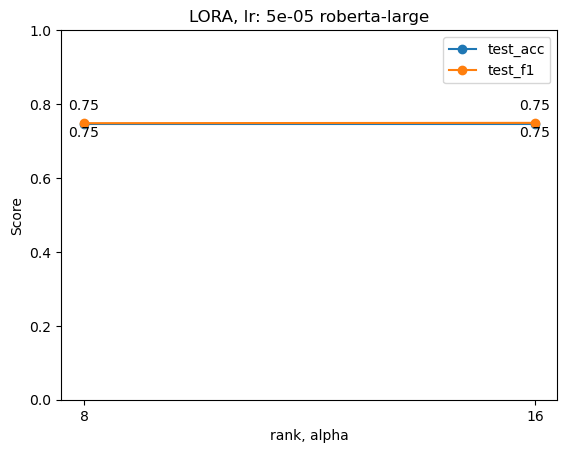

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f